In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv', sep=',')
df['nPregnancies'] = df['nPregnancies'].replace(np.nan, 0)
df['nBabies'] = df['nBabies'].replace(np.nan, 0)
df['Education'] = df['Education'].replace(np.nan, 'Unkown')
df['MaritalStatus'] = df['MaritalStatus'].replace(np.nan, 'Unkown')
df['RelationshipStatus'] = df['RelationshipStatus'].replace(np.nan, 'Unkown')
df['SmokingStatus'] = df['SmokingStatus'].replace(np.nan, 'Unkown')
df['DiabetesAge'] = df['DiabetesAge'].replace(np.nan, 'Unkown')
df['SleepHrsNight'] = df['SleepHrsNight'].replace(np.nan, 'Unkown')
df['Work'] = df['Work'].replace(np.nan, 'Unkown')
df['AlcoholYear'] = df['AlcoholYear'].replace(np.nan, 0)
df['AlcoholDay'] = df['AlcoholDay'].replace(np.nan, 0)
df['PhysActiveDays'] = df['PhysActiveDays'].replace(np.nan, 0)
df['PhysActive'] = df['PhysActive'].replace(np.nan, 'Unkown')
df['Income'] = df['Income'].replace(np.nan, 0)
df['Poverty'] = df['Poverty'].replace(np.nan, 0)
df['WeightPounds'] = df['Weight']*2.2
df.head()

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus,WeightPounds
0,62163,male,14,Asian,Unkown,Unkown,Unkown,Yes,100000.0,4.07,...,Unkown,0.0,0.0,Unkown,No,1.0,0.0,0.0,Unkown,108.68
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,Unkown,3.0,2.0,8.0,No,2.0,3.0,104.0,Current,216.92
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,Unkown,0.0,0.0,9.0,No,7.0,0.0,0.0,Never,210.76
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,Unkown,0.0,0.0,9.0,No,5.0,0.0,0.0,Never,210.76
4,62175,male,5,White,Unkown,Unkown,Unkown,Yes,12500.0,0.39,...,Unkown,0.0,0.0,Unkown,Unkown,7.0,0.0,0.0,Unkown,52.58


In [ ]:
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3866 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3866 non-null   int64  
 1   Gender              3866 non-null   object 
 2   Age                 3866 non-null   int64  
 3   Race                3866 non-null   object 
 4   Education           3866 non-null   object 
 5   MaritalStatus       3866 non-null   object 
 6   RelationshipStatus  3866 non-null   object 
 7   Insured             3866 non-null   object 
 8   Income              3866 non-null   float64
 9   Poverty             3866 non-null   float64
 10  HomeRooms           3866 non-null   float64
 11  HomeOwn             3866 non-null   object 
 12  Work                3866 non-null   object 
 13  Weight              3866 non-null   float64
 14  Height              3866 non-null   float64
 15  BMI                 3866 non-null   float64
 16  Pulse      

(3866, 33)

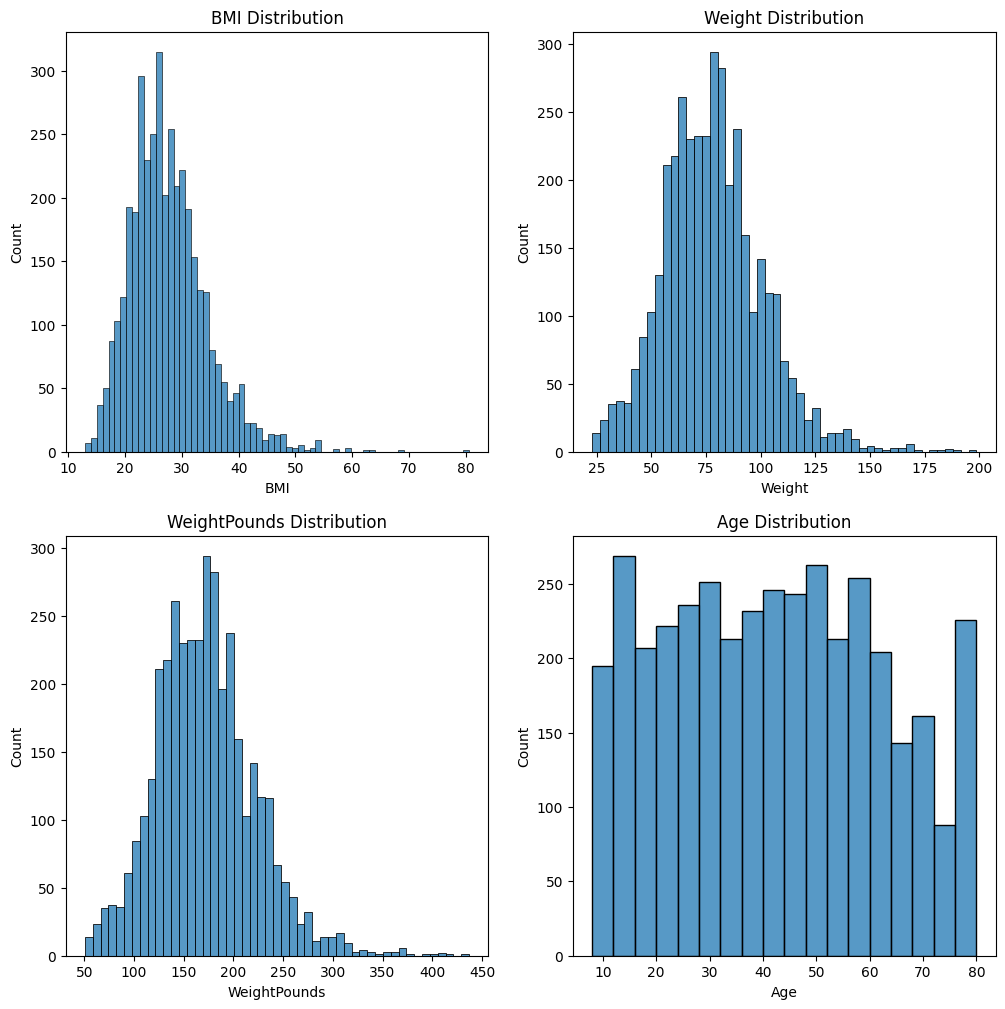

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(df['BMI'])
plt.title('BMI Distribution')
plt.subplot(2,2,2)
sns.histplot(df['Weight'])
plt.title('Weight Distribution')
plt.subplot(2,2,3)
sns.histplot(df['WeightPounds'])
plt.title('WeightPounds Distribution')
plt.subplot(2,2,4)
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
print(df['Pulse'].mean())
print(df['BPDia'].min(),'-', df['BPDia'].max())
print(df['Income'].var(), '-', df['Income'].std())

73.58096223486808
0.0 - 116.0
1251173122.786046 - 35371.925630166734


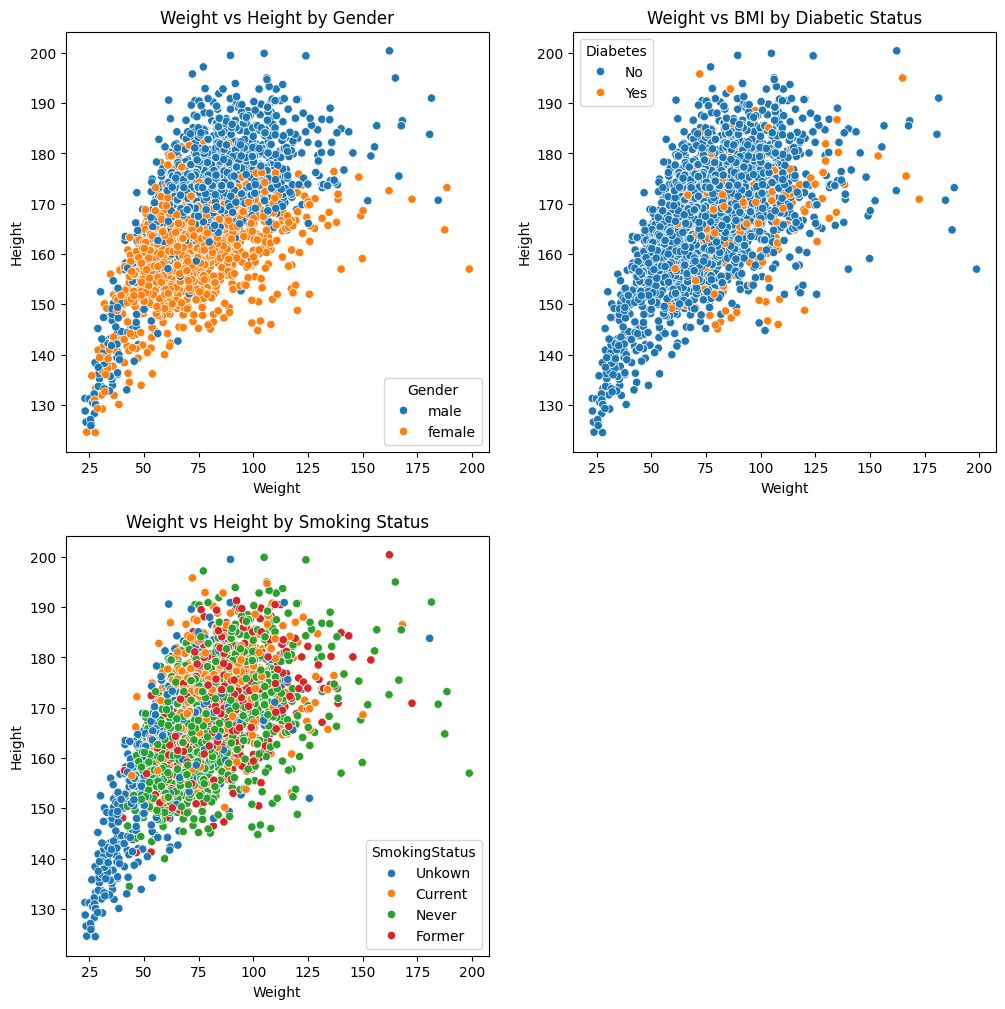

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender')
plt.title('Weight vs Height by Gender')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Weight', y='Height', hue='Diabetes')
plt.title('Weight vs BMI by Diabetic Status')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Weight', y='Height', hue='SmokingStatus')
plt.title('Weight vs Height by Smoking Status')
plt.show()

In [ ]:
from scipy import stats
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)
df['Diabetes'] = pd.get_dummies(df['Diabetes'], drop_first=True)
df= df[df['RelationshipStatus'] != 'Unkown']
df['RelationshipStatus'] = pd.get_dummies(df['RelationshipStatus'], drop_first=True)

t_stat, p_value = stats.ttest_ind(df['Age'], df['Gender'])
print(t_stat, p_value)
t_stat, p_value = stats.ttest_ind(df['AlcoholYear'], df['RelationshipStatus'])
print(t_stat, p_value)
t_stat, p_value = stats.ttest_ind(df['BMI'], df['Diabetes'])
print(t_stat, p_value)

165.4658066141152 0.0
37.40561916873719 6.648928444894326e-280
nan nan
